In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfx = pd.read_csv("linearX.csv")
dfy = pd.read_csv("linearY.csv")

In [5]:
x = dfx.values
y = dfy.values

In [6]:
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


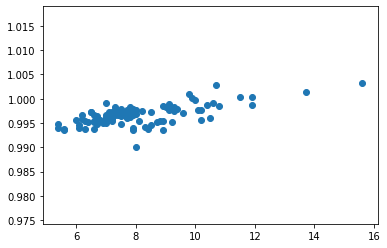

In [7]:
plt.scatter(x,y)

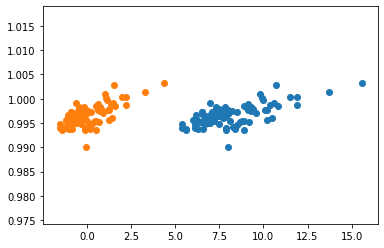

In [8]:
X = (x-x.mean())/(x.std())
Y = y
plt.scatter(x,y)
plt.scatter(X,Y)
plt.show()

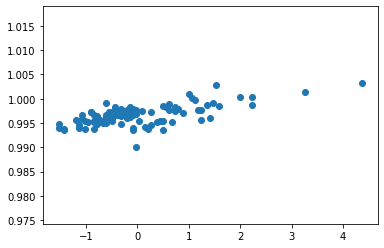

In [7]:
plt.scatter(X,Y)
plt.show()

[0.99663414 0.00135794]


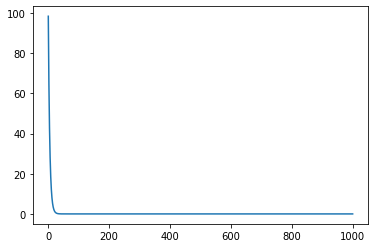

In [9]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x
def error(X,Y,theta):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
    return error
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx=   hypothesis(X[i], theta)     
        grad[0]+= hx - Y[i]
        grad[1] += (hx - Y[i]) * X[i]
    return grad
        
def gradientDescent(X, Y , learningRate=0.001):
    theta = np.zeros((2,))
    itr = 0
    error_list=[]
    
    while(itr<=1000):
        grad = gradient(X,Y,theta)
        e=error(X,Y,theta)
        theta[0]=theta[0] - learningRate*grad[0]
        theta[1]=theta[1] - learningRate*grad[1]
        error_list.append(e)
        itr+=1
    return theta,error_list
    
final_theta, error_list = gradientDescent(X,Y)
plt.plot(error_list)
print(final_theta)

In [24]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


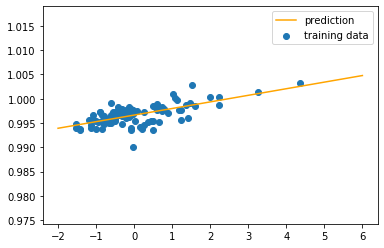

In [28]:
plt.scatter(X,Y, label="training data")
plt.plot(xtest, hypothesis(xtest,final_theta), color='orange', label='prediction')
plt.legend()
plt.show()